# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [2]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [ ]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus = pd.read_csv('df_seoul_bus_station.csv', sep=',', encoding='UTF-8')
bus.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
moving = pd.read_csv('df_seoul_moving.csv', sep=',', encoding='UTF-8')
moving.head()

,자치구,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구
0,강남구,23.094565,90.253484,11437560,4.469795e+07
1,강동구,25.670084,64.295841,8430800,2.111662e+07
2,강북구,23.811274,39.173345,7649610,1.258483e+07
3,강서구,25.124068,58.487098,9388010,2.185464e+07
4,관악구,23.377928,49.943910,8772170,1.874060e+07


In [19]:
foreign = pd.read_csv('df_seoul_foreign.csv', sep=',', encoding='UTF-8')
foreign.head()

,자치구,등록 외국인(남),등록 외국인(여),총 등록 외국인
0,종로구,4107,5302,9409
1,중구,4421,4856,9277
2,용산구,7836,6513,14349
3,성동구,2815,3721,6536
4,광진구,5179,7224,12403


In [30]:
pop = pd.read_csv('df_seoul_people.csv', sep=',', encoding='UTF-8')
pop.head()

,자치구,총 등록 인구,총 등록 한국인,총 등록 외국인
0,종로구,153684,144275,9409
1,중구,131450,122173,9277
2,용산구,236518,222169,14349
3,성동구,291609,285073,6536
4,광진구,353110,340707,12403


In [32]:
df = pd.merge(bus, moving, how='inner', on='자치구')
df = pd.merge(df, pop, how='inner', on='자치구')
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구,총 등록 인구,총 등록 한국인,총 등록 외국인
0,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.253484,11437560,4.469795e+07,537338,532577,4761
1,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.295841,8430800,2.111662e+07,465097,461300,3797
2,강북구,413,67,4825181,4671783,133.020373,128.791504,23.811274,39.173345,7649610,1.258483e+07,300824,297384,3440
3,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.487098,9388010,2.185464e+07,578426,573046,5380
4,관악구,466,86,7655819,7792476,154.753674,157.516040,23.377928,49.943910,8772170,1.874060e+07,500336,486375,13961


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

- 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
- 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
- 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1: 승차 총 승객 수와 하차 총 승객 수는 강한 상관관계를 가질 것이다

* 가설 2: 승하차 총 승객수가 많은 지역에 정류장이 많을 것이다

* 가설 3: 승하차 총 승객수가 많은 지역에 노선이 많을 것이다

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [8]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib import rcParams

### 1) 자치구별 승차 총 승객수 비교


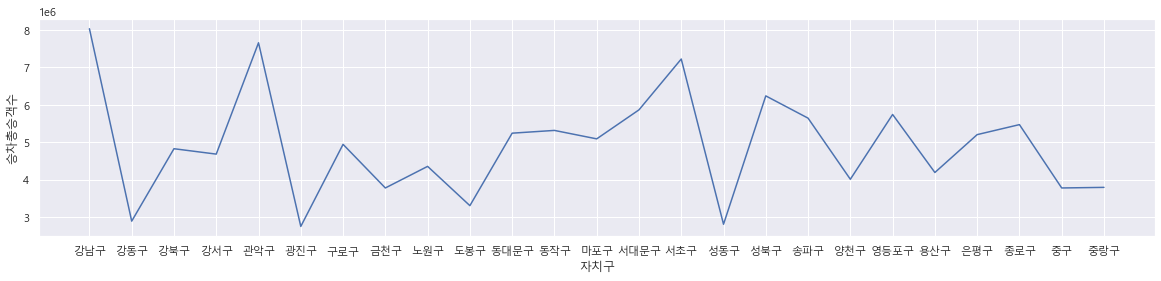

In [33]:
rcParams['figure.figsize'] = 20,4
sns.lineplot(data = df, x= '자치구', y='승차총승객수')
plt.show()

### 2) 자치구별 정류장 수 비교

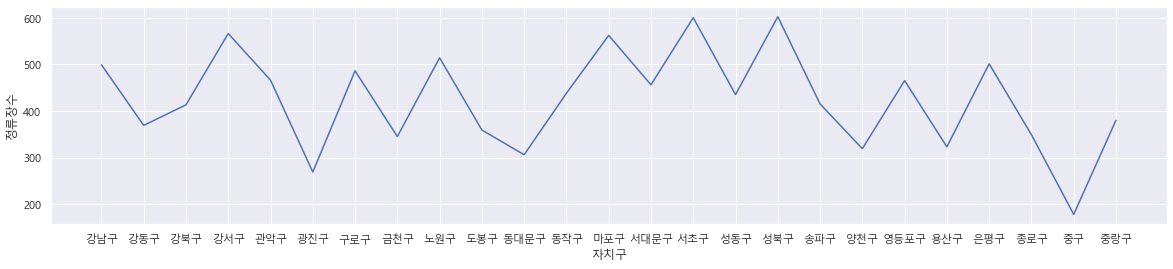

In [31]:
rcParams['figure.figsize'] = 20,4
sns.lineplot(data = df, x= '자치구', y='정류장수')
plt.show()

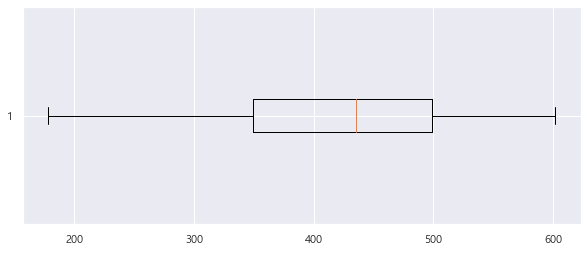

In [60]:
plt.boxplot(df['정류장수'], vert = False)
plt.show()

### 3) 자치구별 노선 개수 비교

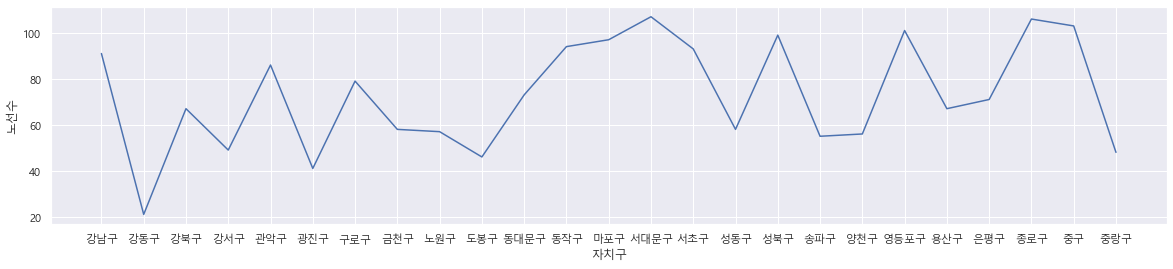

In [32]:
rcParams['figure.figsize'] = 20,4
sns.lineplot(data = df, x= '자치구', y='노선수')
plt.show()

### 4) 자치구별 외국인 거주 인구 수 비교

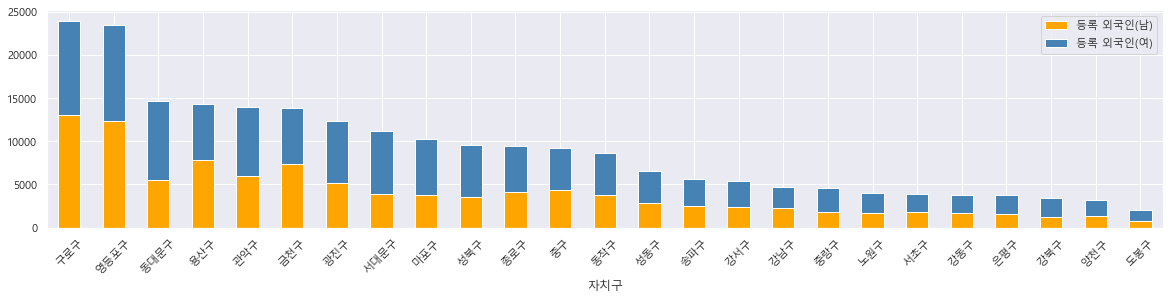

In [20]:
rcParams['figure.figsize'] = 20,4
# foreign.sort_values(by='총 등록 외국인', ascending=False, inplace=True)
# foreign = foreign.drop('총 등록 외국인', axis=1)
foreign.set_index('자치구').plot(kind='bar', stacked=True, color=['orange', 'steelblue'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [26]:
df.corr()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동시간,평균 이동인구,총 이동시간,총 이동인구
정류장수,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.223747,0.374734,0.356947,0.355655
노선수,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.678600,-0.003918,0.388332,0.226426
승차총승객수,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.110113,0.473940,0.581339,0.576562
하차총승객수,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.097082,0.463794,0.572769,0.558711
승차평균승객수,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.382202,-0.079876,0.140483,0.067905
하차평균승객수,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.356171,-0.072604,0.148381,0.062375
평균 이동시간,0.223747,-0.678600,-0.110113,-0.097082,-0.382202,-0.356171,1.000000,0.373424,-0.141914,0.095747
평균 이동인구,0.374734,-0.003918,0.473940,0.463794,-0.079876,-0.072604,0.373424,1.000000,0.808106,0.951299
총 이동시간,0.356947,0.388332,0.581339,0.572769,0.140483,0.148381,-0.141914,0.808106,1.000000,0.923307
총 이동인구,0.355655,0.226426,0.576562,0.558711,0.067905,0.062375,0.095747,0.951299,0.923307,1.000000


In [ ]:
# 1. 승차 인원이 많은 지역 = 하차 인원이 많은 지역
# 2. 승하차 인원이 많은 지역과 지역 내 정류장 수는 관계성을 보이지 X
# 3. 승하차 인원이 많은 지역과 지역 내 노선수는 어느 정도 관계 O

In [40]:
target = '정류장수'

### 1) 노선 수 -> 정류장 수

In [ ]:
rcParams['figure.figsize'] = 10,4
feature = '노선수'

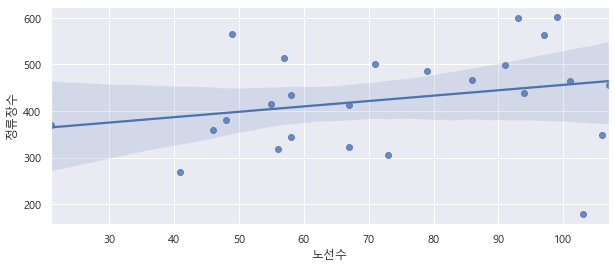

(0.25879843303095595, 0.2116069696436893)


In [37]:
sns.regplot(feature, target, data=df)
plt.show()

print(spst.pearsonr(df[feature], df[target]))

### 2) 승차 총 승객수 -> 정류장 수

In [38]:
feature = '승차총승객수'

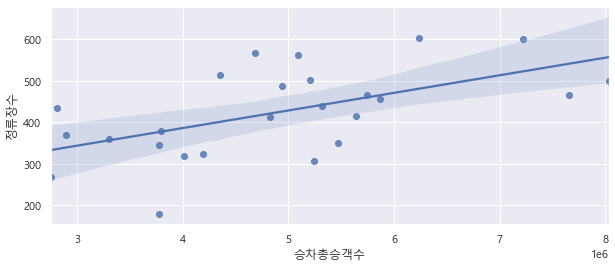

(0.5666813370974586, 0.003141977397117319)


In [41]:
sns.regplot(feature, target, data=df)
plt.show()

print(spst.pearsonr(df[feature], df[target]))

### 3) 평균 이동인구 -> 정류장 수

In [42]:
feature = '평균 이동인구'

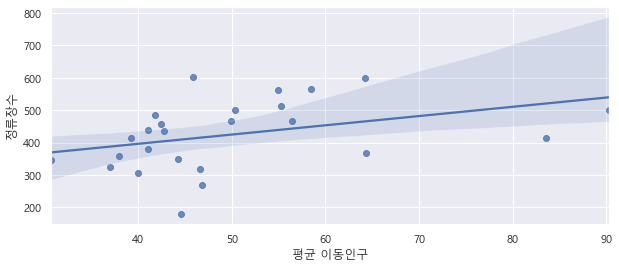

(0.3747341047660696, 0.0649421588991593)


In [43]:
sns.regplot(feature, target, data=df)
plt.show()

print(spst.pearsonr(df[feature], df[target]))

### 4) 총 등록 외국인 수 -> 노선 수

In [38]:
target = '노선수'

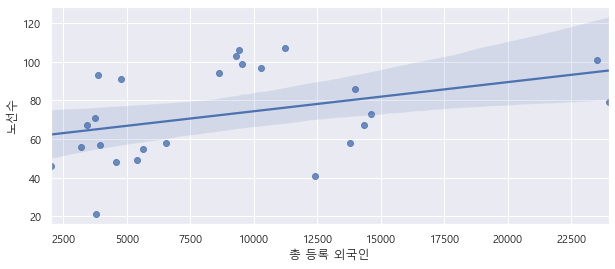

(0.37666689068404635, 0.06346168960296339)


In [39]:
feature = '총 등록 외국인'

rcParams['figure.figsize'] = 10,4
sns.regplot(feature, target, data=df)
plt.show()

print(spst.pearsonr(df[feature], df[target]))

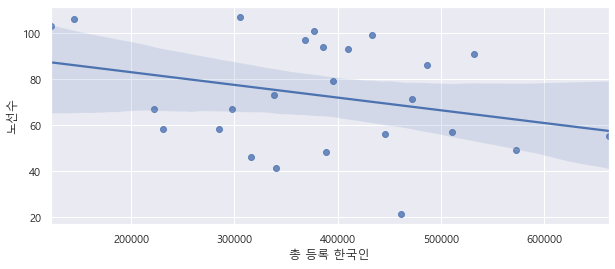

(-0.2959117559230916, 0.1509432774196178)


In [33]:
feature = '총 등록 한국인'

sns.regplot(feature, target, data=df)
plt.show()

print(spst.pearsonr(df[feature], df[target]))

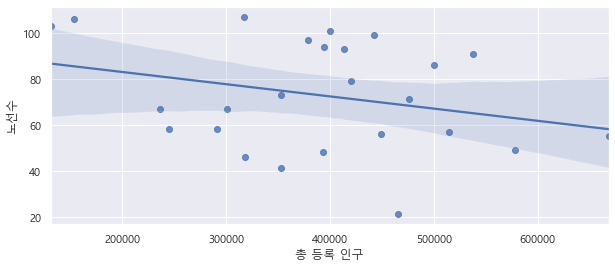

(-0.28153592742780986, 0.1727635564288845)


In [34]:
feature = '총 등록 인구'

rcParams['figure.figsize'] = 10,4
sns.regplot(feature, target, data=df)
plt.show()

print(spst.pearsonr(df[feature], df[target]))

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

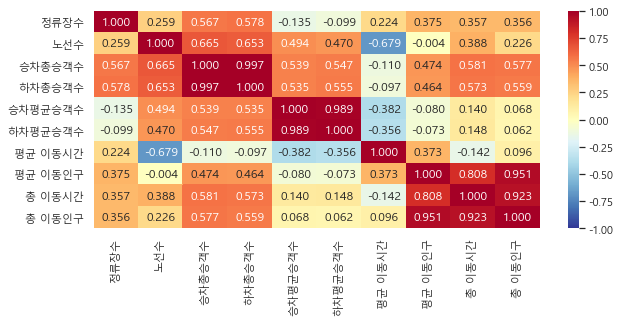

In [44]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

정류장 - 총 승하차 승객 수

### 2) 약한 관계의 변수

정류장 - 평균 승하차 승객 수


## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

종로구 또는 중구
총 승차 승객 수, 평균 이동 인구, 노선 수는 많으나 그에 비해 정류장 수가 압도적으로 적음